- Numerical Interpolation

In [2]:
import numpy as np
import matplotlib.pyplot as pp

In [14]:
def func(x):
    y = 1 / (1+25*x**2)
    return y

# Task A.1 : Lagrangian function
![](2022-11-04-21-27-18.png)

In [3]:
# Function that computes the lagrangian polynomial j at a given point xp with given nodes xn

xn = np.array((1,2,3,4))
j = 2
xp = float(xn[2]) ## x = 3

def Lagrangian (j,xp,xn):
    l = 1
    for k in range(0, len(xn)):
        if (k != (j)):
            l *= (xp - xn[k]) / (xn[j] - xn[k])
                
    return l
                                           
Lagrangian(j,xp,xn)

1.0

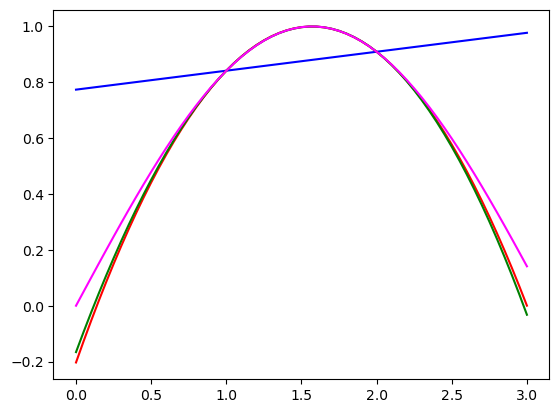

In [4]:
# Task A.2: Interpolation with Lagrange polynomicals

step = 0.05
xn = np.arange(0, 3 + step, step)
yn = np.sin(xn)



## Linear interpolation
xna = np.linspace(1,2,2)
p = np.zeros(len(yn)) 
l = 1

for i in range(0,len(yn)):
    p[i] = np.sin(xna[0]) * Lagrangian(0,xn[i],xna) + np.sin(xna[1]) * Lagrangian(1,xn[i],xna)
    

    
    
pp.show()
pp.plot(xn,p, color="blue")

## Quadratic interpolation
xnb = np.linspace(1,2,3)
p = np.zeros(len(yn)) 
l = 1

for i in range(0,len(yn)):
    p[i] = np.sin(xnb[0]) * Lagrangian(0,xn[i],xnb) + np.sin(xnb[1]) * Lagrangian(1,xn[i],xnb) + np.sin(xnb[2]) * Lagrangian(2,xn[i],xnb)
    
    
pp.plot(xn,p, color="red")

## Cubic interpolation
xnc = np.linspace(1,2,4)
p = np.zeros(len(yn)) 
l = 1

for i in range(0,len(yn)):
    p[i] = np.sin(xnc[0]) * Lagrangian(0,xn[i],xnc) + np.sin(xnc[1]) * Lagrangian(1,xn[i],xnc) + np.sin(xnc[2]) * Lagrangian(2,xn[i],xnc) + np.sin(xnc[3]) * Lagrangian(3,xn[i],xnc)
    
pp.plot(xn,p, color="green")    
    

    
pp.plot(xn,yn, color="magenta")        

    




In [5]:
# Error analysis


t = np.sin(np.pi/2)
p1 = np.sin(xna[0]) * Lagrangian(0,(np.pi/2),xna) + np.sin(xna[1]) * Lagrangian(1,(np.pi/2),xna)
p2 = np.sin(xnb[0]) * Lagrangian(0,(np.pi/2),xnb) + np.sin(xnb[1]) * Lagrangian(1,(np.pi/2),xnb) + np.sin(xnb[2]) * Lagrangian(2,(np.pi/2),xnb)
p3 = np.sin(xnc[0]) * Lagrangian(0,(np.pi/2),xnc) + np.sin(xnc[1]) * Lagrangian(1,(np.pi/2),xnc) + np.sin(xnc[2]) * Lagrangian(2,(np.pi/2),xnc) + np.sin(xnc[3]) * Lagrangian(3,(np.pi/2),xnc)

e1 = t - p1
e2 = t - p2
e3 = t - p3

print(e1)
print(e2)
print(e3)

# Interestingly the quadratic interpolation is more accurate than the cubic one


0.1198139312287847
0.00015128593304059024
0.00022986176651362822


In [6]:
(np.pi/2)

1.5707963267948966

# Task B: Newton interpolation
![](2022-11-04-21-27-51.png)

In [12]:
# This might be working or not - Recursive form
def NewtDivDiff(xn,yn):
    a = len(xn) -1

    if a ==0: # f is the point itself
        f = yn[0]
    else:
        f = ( NewtDivDiff(xn[:-1],yn[:-1]) - NewtDivDiff(xn[1:],yn[1:]) ) / ( xn[0] - xn[-1] )
    return f


# Iterative
def NewtDivDiffIt(xn,yn):
    n = len(xn) - 1
    # set the order: 1 node -> f0; 2 nodes -> f1, etc.
    f = np.copy(yn)
    for j in range(0,n):
        for i in range(0,n-j):
            f[i] = (f[i+1]-f[i]) / (xn[i+j+1]-xn[i])
             
    return f[0]


    
count = 0  
xn = np.linspace(0,10, 11)
yn = np.linspace(0,50, 11)

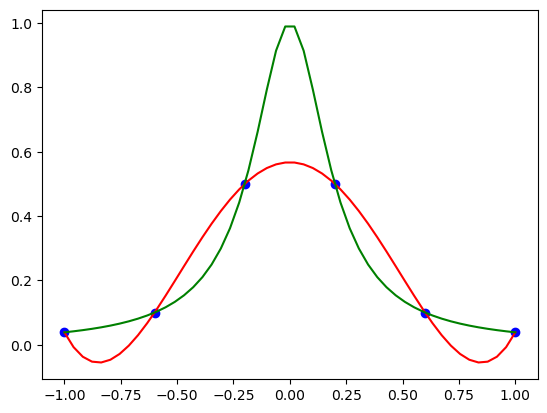

In [15]:
# Copied below plotting script
import matplotlib.pyplot as pl

# main
a = -1 # lower interval
b = 1 # upper interval
Nx = 6 # number of nodes
xn = np.linspace(a,b,Nx)
yn = func(xn)
# determine order
k = Nx - 1


# set the domain of interpolation
x = np.linspace(-1,1,50)
y = []

for xp in x:
    # determine pn at x = xp
    yp = yn[0]
    for i in range(0,k):
        prod = 1
        for j in range(0,i+1):
            prod *= (xp-xn[j])

        yp += prod * NewtDivDiff(xn[0:i+2],yn[0:i+2])

    y += [yp]

# convert list into array
y = np.array(y)   
# plot polynomial in the interpolating range
pl.plot(x,y,c='Red')
# plot the initial nodal info only
pl.scatter(xn,yn,c='Blue')
# plot the actual function
pl.plot(x,func(x),c='Green')
pl.show()

2. Write a script to interpolate, with Newton's method, the function
𝑓(𝑥) = sin (𝑥) over the range x = [0:3] with step 0.05, given the nodal values
at:


In [9]:
xn = np.arange(0,3.05,0.05)
yn = np.sin(xn)



xn1 = np.linspace(1,2,2)
xn2 = np.linspace(1,2,3)
xn3 = np.linspace(1,2,4)

yn1 = np.sin(xn1)
yn2 = np.sin(xn2)
yn3 = np.sin(xn3)

a1 = NewtDivDiff(xn1, yn1)
a2 = NewtDivDiff(xn2, yn2)
a3 = NewtDivDiff(xn3, yn3)


print(a1)
print(a2)
print(a3)

0.0678264420177852
-0.48844312314906135
-0.00775118144271425


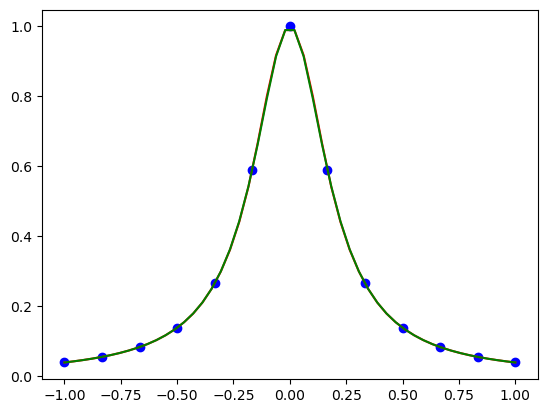

In [17]:
# Spline code copied as mine didnt quite work
# Copy Gauss solver from previous
def MyGauss(A,b):
    
    # number of equations
    n = len(b)
    
    # eliminate the unknowns, from first to (n-1)th unknown, to form an upper triangular matrix
    for i in range(0,n-1):
        # eliminate the i-th unknown from the (i+1)th row downwards
        # i.e. set the zeros in column i.
        for j in range(i+1,n):
            # eliminate on row j

            # A(i,i) is the pivot coefficient
            p = A[j,i] / A[i,i]
        
            # compute the new elements of row j in matrix A
            # use slicing
            #A[j,:] = A[j,:] - p * A[i,:]
            # or, alternatively, loop for every cell of row j
            #for k in range(i,n):
            #    A[j,k] = A[j,k] - p * A[i,k]
            A[j,:] = A[j,:] - p * A[i,:]

            # compute the new element of row j in vector b
            b[j] = b[j] - p * b[i]
    
    
    # evauate, by back substitution the solution
    # start from the last unknown and go upward till the first unknown
    x = np.zeros(n)
    for i in range(n-1,-1,-1):
        # contribution from b (right hand side of the equation)
        x[i] = b[i] / A[i,i]
        # contribution from the other (already evaluated) unknowns
        # (within the left hand side of the equation)
        for k in range(i+1,n):
            x[i] = x[i] - A[i,k] * x[k] / A[i,i]

    return x
##????

import numpy as np
import matplotlib.pyplot as pl
# spline


# set the nodal info
a = -1 # lower interval
b = 1 # upper interval
Nx = 13 # number of nodes
xn = np.linspace(a,b,Nx)
yn = func(xn)

bclower = 0.0740
bcupper = -0.0740

# set the domain of interpolation
x = np.linspace(a,b,50)
y = np.ndarray(len(x))


# determine cubic coefficients aj, bj, cj, dj
# there need to be ns = Nx - 1 cubic splines
ns = Nx - 1
aj = np.ndarray(ns)
bj = np.ndarray(ns)
cj = np.ndarray(ns)
dj = np.ndarray(ns)

# form the matrix A (of unknown)
A = np.zeros((Nx,Nx))
b = np.zeros(Nx)

A[0,0] = 1
b[0] = bclower
A[-1,-1] = 1
b[-1] = bcupper
for j in range(1,ns):
    A[j,j-1] = 1 / (xn[j]-xn[j-1])
    A[j,j] = 2 / (xn[j]-xn[j-1]) + 2 / (xn[j+1]-xn[j])
    A[j,j+1] = 1 / (xn[j+1]-xn[j])
    
    b[j] = 3 * ( (yn[j]-yn[j-1]) / (xn[j]-xn[j-1])**2 + (yn[j+1]-yn[j]) / (xn[j+1]-xn[j])**2 )

# invert the matrix
#v = np.linalg.inv(A).dot(b)
v = MyGauss(A,b)
# determine the coefficients
for j in range(0,ns):
    aj[j] = yn[j]
    bj[j] = v[j]
    cj[j] = 3*(yn[j+1]-yn[j])/(xn[j+1]-xn[j])**2 - (v[j+1]+2*v[j])/(xn[j+1]-xn[j])
    dj[j] = -2*(yn[j+1]-yn[j])/(xn[j+1]-xn[j])**3 + (v[j+1]+v[j])/(xn[j+1]-xn[j])**2
    
# interpolate with spline
for j in range(0,ns):
    y[(xn[j]<=x) & (x<=xn[j+1])] = aj[j] + bj[j]*(x[(xn[j]<=x) & (x<=xn[j+1])]-xn[j]) +  \
          cj[j]*(x[(xn[j]<=x) & (x<=xn[j+1])]-xn[j])**2 + dj[j]*(x[(xn[j]<=x) & (x<=xn[j+1])]-xn[j])**3
    

# plot polynomial in the interpolating range
pl.plot(x,y,c='Red')
# plot the initial nodal info only
pl.scatter(xn,yn,c='Blue')
# plot the actual function
pl.plot(x,func(x),c='Green')
pl.show()